![display relevant image here](path/url/to/image)
- Banner/header image

# Title
- Relevant to Data and Business Context

## Overview
- BLUF (Bottom Line Up Front)
- One paragraph summary of final model performance and business implications
- Frame your 'story'

## Business Understanding

1. Begin by thoroughly analyzing the business context of FinTech Innovations' loan approval process. Write a short summary that:
- Describes the current manual process and its limitations
- Identifies key stakeholders and their needs
- Explains the implications of different types of model errors
- Justifies your choice between classification and regression approaches

- The current loan approval process is done manually by individuals at FinTech.  This leads to slower response time to loan applicants and can also lead to inconsistent decisions due to different individuals reviewing loans.  Each inappropriate loan given, or not given, leads to money lost by FinTech.  If a loan is declined for someone who was credit worth and should have been approved, FinTech profit is down by 8k.  If a loan is approved for an applicant who should have been denied, the average loss is 50k.  This makes the CFO and other officials in the company key stakeholders as it directly impacts the profit and/or loss of the company.  Also the loan approvers are key stakeholders as they will be using the model to make final decisions on loans to the customers.
- There are different types of model errors which can be useful in these scenarios.  Recall will allow for more false negatives.  meaning that you will be able to get more customers approved, adding 8K to the profit.  Precision focuses on false positives.  So it'll minimize the number of false positives, meaning it'll minimize the number of 50k loss the company takes.  Accuracy takes into account both false positives and false negatives and tries to make the model as accurate as possible as the name would describe.  F1-score is the score that finds the balance between precision and recall.  Given the impact of approving bad loans, precision would be more important in this scenario as you want to make sure all approved loans are true positives as much as possible.
- The model choice between categorical (approved, denied) and regressional (risk score) is a business decision.  Whether you would want the final say to be by the model making it more consistent, but also could miss ambiguous data that is not present.  Or would you want the final decision to be by an employee who reviews the risk score and makes final decision.  Both approches would suffice, but risk score would give more of an overall risk assessment on the loan.  However, since the goal is to standardize loan approval process, rather than having an employee make the final decision, a classification model would fit best for complete standardization.


- 
2. Define your modeling goals and success criteria:
- Select appropriate evaluation metrics based on business impact
- You must use at least two different metrics
- Consider creating custom metric
- Establish baseline performance targets
- Document your reasoning for each choice


## Data Understanding
3. Conduct comprehensive exploratory data analysis:
- Describe basic data characteristics
- Examine distributions of all features and target variables
- Investigate relationships between features
- Create visualizations to help aid in EDA
- Document potential data quality issues and their implications

4. Develop feature understanding:
- Categorize features by type (numerical, categorical, ordinal)
- Identify features requiring special preprocessing
- Document missing value patterns and their potential meanings
- Note potential feature engineering opportunities


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay

In [2]:
# EDA Code Here - Create New Cells As Needed

#Load in finaincial_loan_data.csv into panda dataframe
df_financial_loan = pd.read_csv('financial_loan_data.csv')

In [3]:
#Display column info for data
df_financial_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  object 
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  object 
 4   EducationLevel              19099 non-null  object 
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               18669 non-null  object 
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  object 
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

In [13]:
# Data on numerical columns
df_financial_loan.describe()

,Age,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,0.993000,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,0.986965,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,0.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,1.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,2.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,7.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [4]:
#display first 5 rows
df_financial_loan.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,"$39,948.00",617,Employed,Master,22,13152,48,Married,2,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,"$39,709.00",628,Employed,Associate,15,26045,48,Single,1,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,"$40,724.00",570,Employed,Bachelor,26,17627,36,NaN,2,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,"$69,084.00",545,Employed,High School,34,37898,96,Single,1,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,"$103,264.00",594,Employed,Associate,17,9184,36,Married,1,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [5]:
#display number of Null values for each row
df_financial_loan.isnull().sum()

Age                              0
AnnualIncome                     0
CreditScore                      0
EmploymentStatus                 0
EducationLevel                 901
Experience                       0
LoanAmount                       0
LoanDuration                     0
MaritalStatus                 1331
NumberOfDependents               0
HomeOwnershipStatus              0
MonthlyDebtPayments              0
CreditCardUtilizationRate        0
NumberOfOpenCreditLines          0
NumberOfCreditInquiries          0
DebtToIncomeRatio                0
BankruptcyHistory                0
LoanPurpose                      0
PreviousLoanDefaults             0
PaymentHistory                   0
LengthOfCreditHistory            0
SavingsAccountBalance          572
CheckingAccountBalance           0
TotalAssets                      0
TotalLiabilities                 0
MonthlyIncome                    0
UtilityBillsPaymentHistory       0
JobTenure                        0
NetWorth            

In [6]:
# Load in Kaggle data
df_loan = pd.read_csv("Loan.csv")

In [7]:
# Display column info
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [14]:
# Numerical data summary
df_loan.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [8]:
# First 5 rows
df_loan.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [9]:
# Null value summary
df_loan.isnull().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

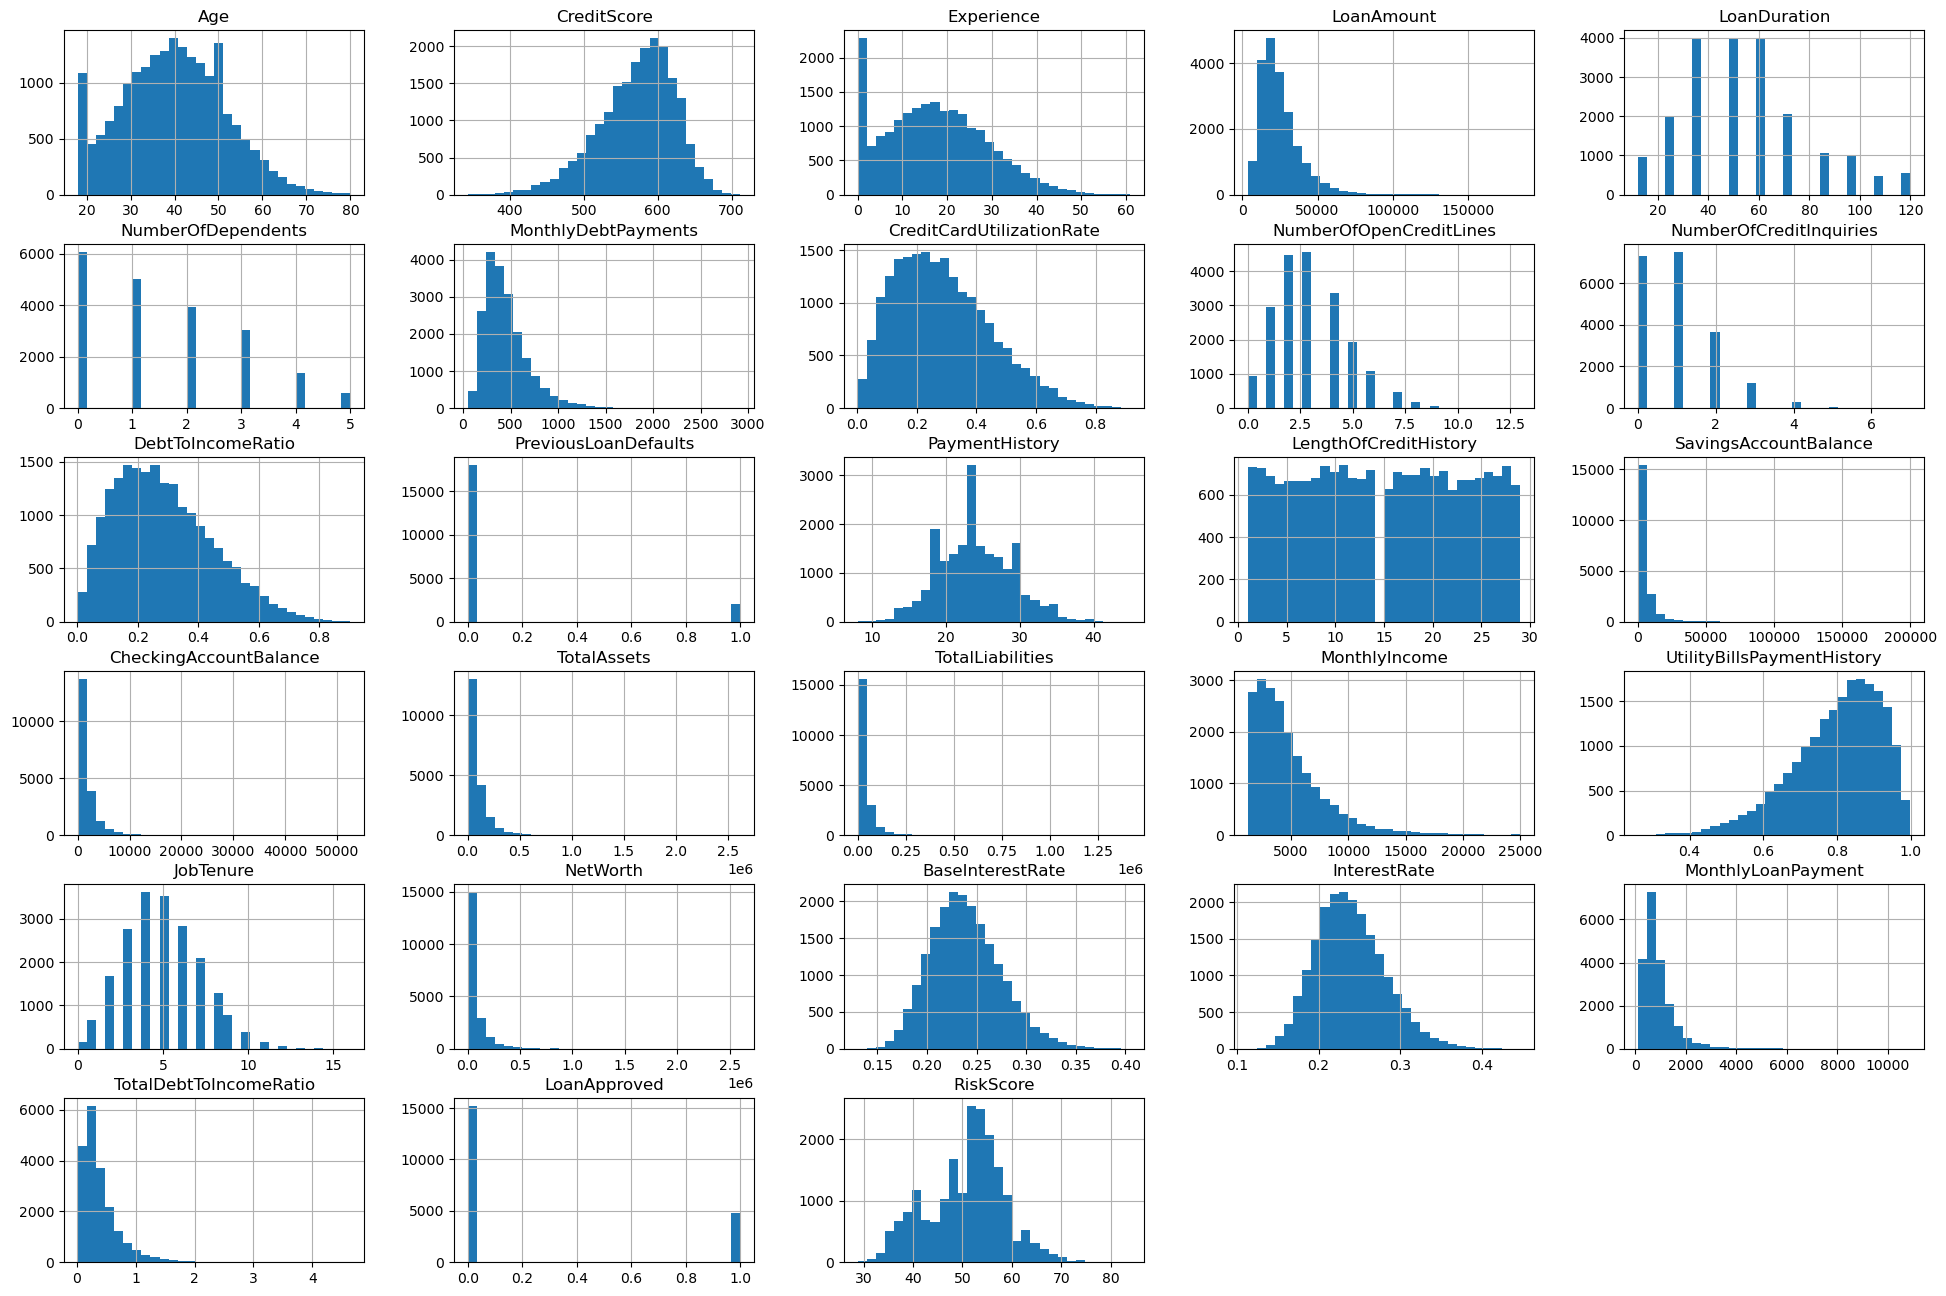

In [26]:
# Plot graphs for data distribution per column
df_financial_loan.hist(figsize=(24, 16), bins=30)
plt.show()

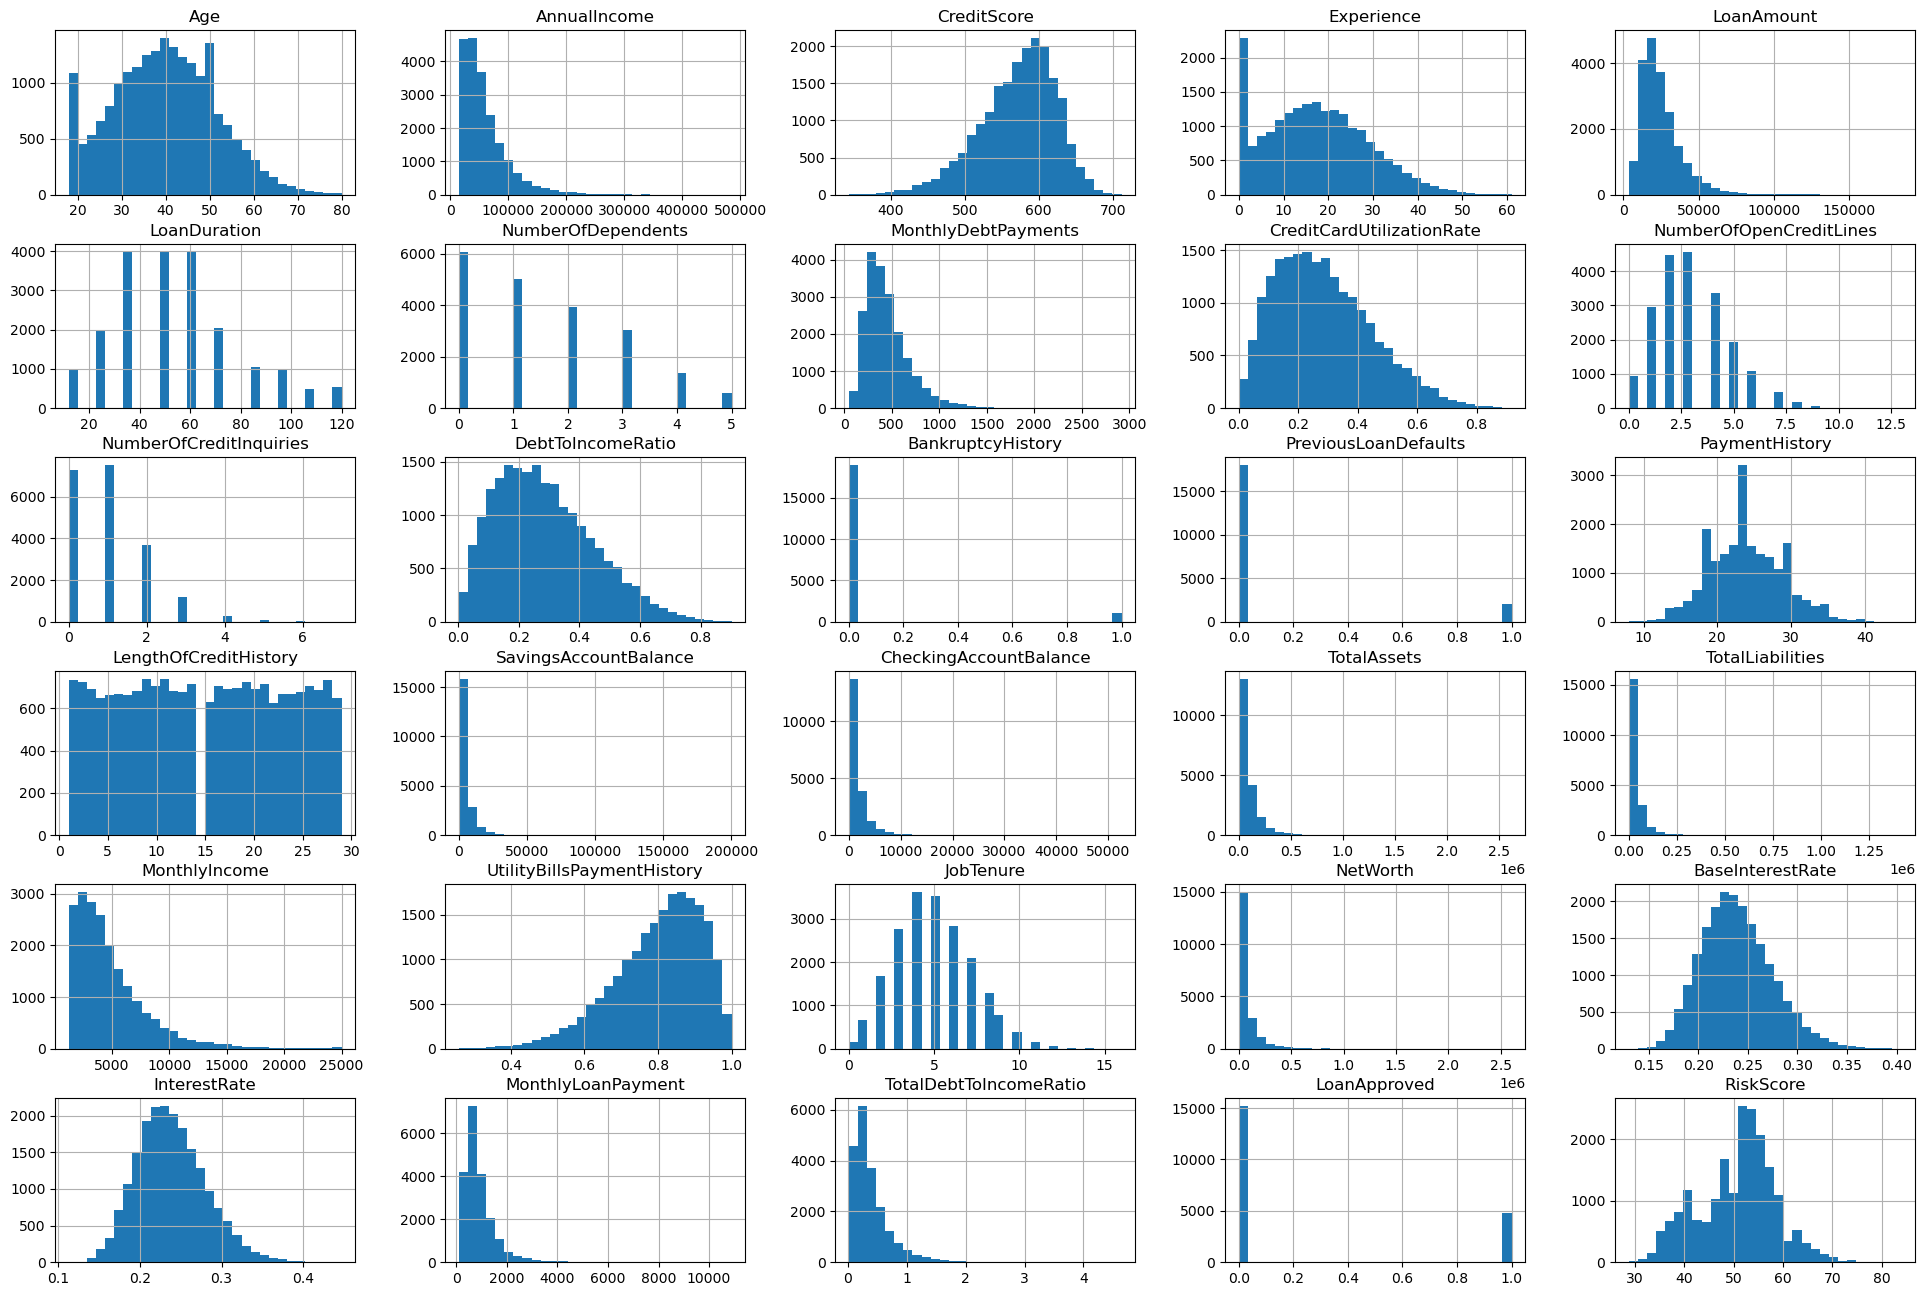

In [25]:
# Graphs for Kaggle data
df_loan.hist(figsize=(24, 16), bins=30)
plt.show()

In [30]:
#Create new DF without categorical data for correlation matrix
numerical_df_financial_loan = df_financial_loan.select_dtypes(include=['number'])
numerical_df_loan = df_loan.select_dtypes(include=['number'])



In [31]:
#Get the correlation Matrix for the numerical data
correlation_fl = numerical_df_financial_loan.corr()
correlation_l = numerical_df_loan.corr()

In [41]:
#Financial Loan data for loan approved and risk score
corr_fl_filtered = correlation_fl.loc[:, ['LoanApproved', 'RiskScore']]
corr_fl_filtered

,LoanApproved,RiskScore
Age,0.141029,-0.164304
CreditScore,0.142000,-0.240198
Experience,0.140755,-0.166496
LoanAmount,-0.239496,0.137981
LoanDuration,-0.094558,0.054550
NumberOfDependents,0.001717,0.001686
MonthlyDebtPayments,-0.070415,0.036938
CreditCardUtilizationRate,-0.010466,0.108758
NumberOfOpenCreditLines,-0.004769,0.007762
NumberOfCreditInquiries,-0.005885,0.003103


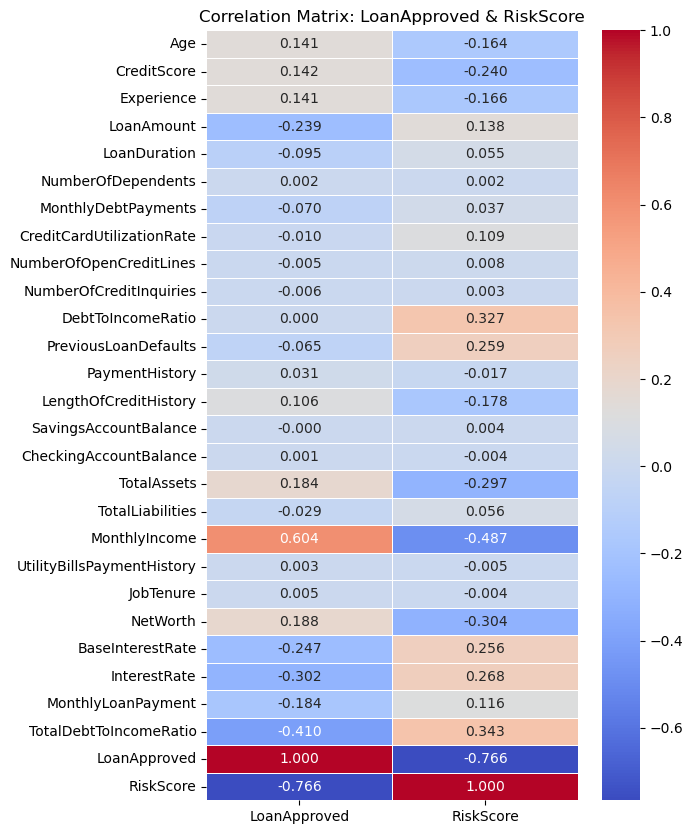

In [48]:
plt.figure(figsize=(6, 10))
sns.heatmap(corr_fl_filtered, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Correlation Matrix: LoanApproved & RiskScore")
plt.show()


In [42]:
#Kaggle Data correlation Matrix for Loan approved and risk score
corr_l_filtered = correlation_l.loc[:, ['LoanApproved', 'RiskScore']]
corr_l_filtered

,LoanApproved,RiskScore
Age,0.141029,-0.164304
AnnualIncome,0.597900,-0.483289
CreditScore,0.142000,-0.240198
Experience,0.140755,-0.166496
LoanAmount,-0.239496,0.137981
LoanDuration,-0.094558,0.054550
NumberOfDependents,0.001717,0.001686
MonthlyDebtPayments,-0.070415,0.036938
CreditCardUtilizationRate,-0.010466,0.108758
NumberOfOpenCreditLines,-0.004769,0.007762


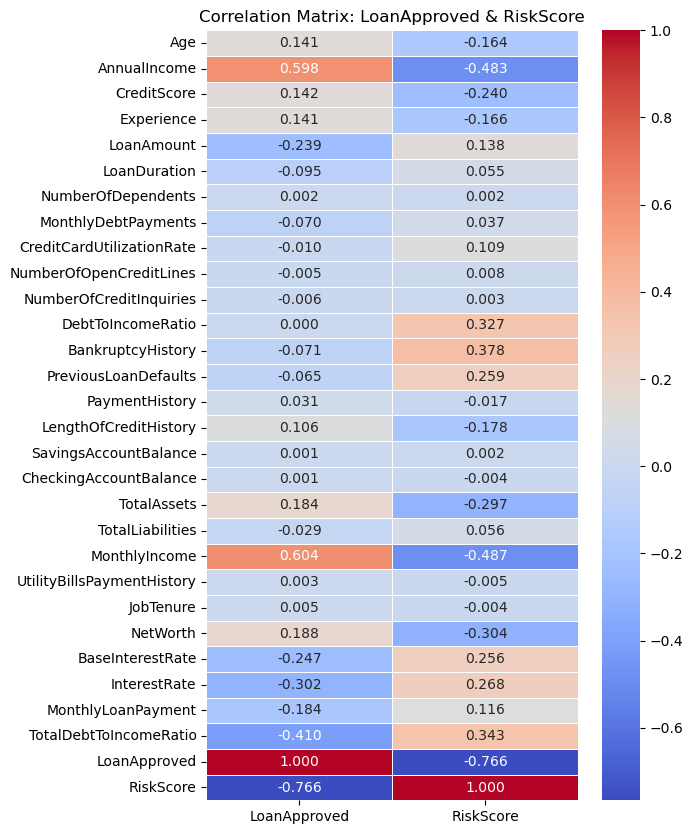

In [49]:
plt.figure(figsize=(6, 10))
sns.heatmap(corr_l_filtered, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Correlation Matrix: LoanApproved & RiskScore")
plt.show()

In [50]:
df_financial_loan.dtypes

Age                             int64
AnnualIncome                   object
CreditScore                     int64
EmploymentStatus               object
EducationLevel                 object
Experience                      int64
LoanAmount                      int64
LoanDuration                    int64
MaritalStatus                  object
NumberOfDependents              int64
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory              object
LoanPurpose                    object
PreviousLoanDefaults            int64
PaymentHistory                  int64
LengthOfCreditHistory           int64
SavingsAccountBalance         float64
CheckingAccountBalance          int64
TotalAssets                     int64
TotalLiabilities                int64
MonthlyIncome                 float64
UtilityBills

In [62]:
category_df_fl = df_financial_loan.select_dtypes(exclude=['number'])

category_df_fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AnnualIncome         20000 non-null  object
 1   EmploymentStatus     20000 non-null  object
 2   EducationLevel       19099 non-null  object
 3   MaritalStatus        18669 non-null  object
 4   HomeOwnershipStatus  20000 non-null  object
 5   BankruptcyHistory    20000 non-null  object
 6   LoanPurpose          20000 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


In [65]:
#Check unique values of columns
print(category_df_fl['EmploymentStatus'].unique())
print(category_df_fl['EducationLevel'].unique())
print(category_df_fl['MaritalStatus'].unique())
print(category_df_fl['HomeOwnershipStatus'].unique())
print(category_df_fl['BankruptcyHistory'].unique())
print(category_df_fl['LoanPurpose'].unique())

['Employed' 'Self-Employed' 'Unemployed']
['Master' 'Associate' 'Bachelor' 'High School' nan 'Doctorate']
['Married' 'Single' nan 'Divorced' 'Widowed']
['Own' 'Mortgage' 'Rent' 'Other']
['No' 'Yes']
['Home' 'Debt Consolidation' 'Education' 'Other' 'Auto']


In [67]:
category_df_fl['AnnualIncome']

0         $39,948.00
1         $39,709.00
2         $40,724.00
3         $69,084.00
4        $103,264.00
            ...     
19995     $30,180.00
19996     $49,246.00
19997     $48,958.00
19998     $41,025.00
19999     $53,227.00
Name: AnnualIncome, Length: 20000, dtype: object

In [51]:
df_loan.dtypes

ApplicationDate                object
Age                             int64
AnnualIncome                    int64
CreditScore                     int64
EmploymentStatus               object
EducationLevel                 object
Experience                      int64
LoanAmount                      int64
LoanDuration                    int64
MaritalStatus                  object
NumberOfDependents              int64
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
LoanPurpose                    object
PreviousLoanDefaults            int64
PaymentHistory                  int64
LengthOfCreditHistory           int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
TotalAssets                     int64
TotalLiabilities                int64
MonthlyIncom

In [54]:
#Get non numerical columns
category_df_l = df_loan.select_dtypes(exclude=['number'])

#View columns
category_df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ApplicationDate      20000 non-null  object
 1   EmploymentStatus     20000 non-null  object
 2   EducationLevel       20000 non-null  object
 3   MaritalStatus        20000 non-null  object
 4   HomeOwnershipStatus  20000 non-null  object
 5   LoanPurpose          20000 non-null  object
dtypes: object(6)
memory usage: 937.6+ KB


In [64]:
#Check unique values of columns
print(category_df_l['EmploymentStatus'].unique())
print(category_df_l['EducationLevel'].unique())
print(category_df_l['MaritalStatus'].unique())
print(category_df_l['HomeOwnershipStatus'].unique())
print(category_df_l['LoanPurpose'].unique())

['Employed' 'Self-Employed' 'Unemployed']
['Master' 'Associate' 'Bachelor' 'High School' 'Doctorate']
['Married' 'Single' 'Divorced' 'Widowed']
['Own' 'Mortgage' 'Rent' 'Other']
['Home' 'Debt Consolidation' 'Education' 'Other' 'Auto']


In [69]:
category_df_l['ApplicationDate']

0        2018-01-01
1        2018-01-02
2        2018-01-03
3        2018-01-04
4        2018-01-05
            ...    
19995    2072-09-29
19996    2072-09-30
19997    2072-10-01
19998    2072-10-02
19999    2072-10-03
Name: ApplicationDate, Length: 20000, dtype: object

In [70]:
fl_numerical_columns = df_financial_loan.select_dtypes(include=['number']).columns.tolist()
l_numerical_columns = df_loan.select_dtypes(include=['number']).columns.tolist()

In [75]:
l_categorical_columns = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']
fl_categorical_columns = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'BankruptcyHistory', 'LoanPurpose']

## Data Preparation
5. Design your preprocessing strategy:
- Create separate preprocessing flows for different feature types
- Must utilize ColumnTransformer and Pipeline
- Consider using FeatureUnion as well
- Handle missing values appropriately for each feature
- Handle Categorical and Ordinal data appropriately
- Scale numeric values if model requires it (linear model)
- Document your reasoning for each preprocessing decision



In [ ]:
# Data Prep Code Here - Create New Cells As Needed
None

## Modeling
6. Implement your modeling approach:
- Choose appropriate model algorithms based on your problem definition
- Set up validation strategy with chosen metrics
- Use a train test split and cross validation
- Create complete pipeline including any preprocessing and model
- Document your reasoning for each modeling decision

7. Optimize your model:
- Define parameter grid based on your understanding of the algorithms
- Implement GridSearchCV and/or RandomizedSearchCV with chosen metrics
- Consider tuning preprocessing steps
- Track and document the impact of different parameter combinations
- Consider the trade-offs between different model configurations

NOTE: Be mindful of time considerations - showcase “how to tune” 


In [ ]:
#  Modeling Code Here - Create New Cells as Needed
None

## Evaluation and Conclusion
8. Conduct thorough evaluation of final model:
- Assess models test data performance using your defined metrics
- Analyze performance across different data segments
- Identify potential biases or limitations
- Visualize model performance
    - Classification: Confusion Matrix/ROC-AUC
    - Regression: Scatter Plot (Predicted vs. Actual values)

9. Extract and interpret feature importance/significance:
- Which features had the most impact on your model?
- Does this lead to any potential business recommendations?

10. Prepare your final deliverable:
- Technical notebook with complete analysis
- Executive summary for business stakeholders
- Recommendations for implementation
- Documentation of potential improvements